In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_excel('RE_Data.xlsx')

In [3]:
df

,ph,c1,c2,c3,c4,ph_labels
0,0.864865,1.014540,1.034225,1.005367,1.010130,3
1,0.323323,0.996483,1.006768,0.996112,0.996632,1
2,0.650651,0.976892,0.999960,0.975132,0.976896,2
3,0.530531,0.999795,1.009186,0.995684,0.997842,2
4,0.846847,0.924600,0.965189,0.922052,0.924822,3
...,...,...,...,...,...,...
49995,0.701702,0.994808,1.013925,0.991568,0.993932,2
49996,0.732733,1.005200,1.018340,0.994954,0.999536,2
49997,0.633634,0.942279,0.974752,0.941610,0.942829,2
49998,0.872873,1.000027,1.022175,0.992673,0.996919,3


In [6]:
# Let's calculate the numeric histogram from the actual test target
hist, bin_edges = np.histogram(df.ph.values, bins=4)
hist, bin_edges

(array([12500, 12500, 12500, 12500]), array([0.  , 0.25, 0.5 , 0.75, 1.  ]))

In [7]:
# Looks like 5 bins make sense. We need a function to map a float to an integer (the class)
def map_float_to_class(number: float):
    """
    Hard code the bin thresholds. 
    Aggregate everything larger than 196000
    """
    if 0.00<= number<0.25:
        return 0
    elif  0.25<=number<0.50:
        return 1
    elif  0.50<=number<0.75:
        return 2
    elif number>=0.75:
        return 3
    else:
        raise ValueError(f'Invalid number: {number}')
        
# Hard coded labels array based on the thresholds defined above for future plotting purposes
labels = ('0.00 - 0.25', '0.25- 0.50','0.50-0.75','0.75-1.0')

In [8]:
ph_labels = [map_float_to_class(y) for y in df.ph.values]

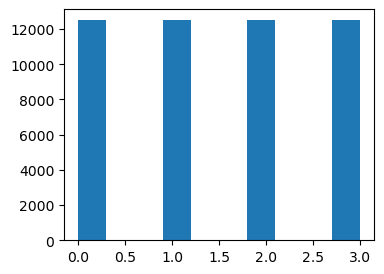

In [9]:
plt.figure(figsize=(4,3))
plt.hist(ph_labels)
plt.show()

In [10]:
df['ph_labels'] = ph_labels

In [11]:
df

,ph,c1,c2,c3,c4,ph_labels
0,0.000000,1.000000,1.000000,1.000000,1.000000,0
1,0.001001,1.000000,1.000000,1.000000,1.000000,0
2,0.002002,0.999999,1.000000,0.999999,0.999999,0
3,0.003003,0.999998,0.999999,0.999998,0.999998,0
4,0.004004,0.999997,0.999999,0.999997,0.999997,0
...,...,...,...,...,...,...
49995,0.995996,1.039471,1.067170,1.016742,1.026988,3
49996,0.996997,1.039542,1.067340,1.016734,1.027017,3
49997,0.997998,1.039613,1.067510,1.016726,1.027046,3
49998,0.998999,1.039683,1.067679,1.016716,1.027073,3


In [12]:
# Save the DataFrame to an Excel file
filename = 'RE_Data.xlsx'
df.to_excel(filename, index=False)